# Проект. Отток клиентов


**Описание:**
Из банка начали уходить клиенты. Так как сохранять текущих клиентов дешевле, чем привлекать новых, то нужно выявлять клиентов, которые могут перестать пользоваться услугами банка с целью дальнейшей работы с этими людьми.

**Цель проекта:**
Построить модель для предсказания, уйдёт ли клиент из банка в ближайшее время. Точность модели проверять метрикой f1. Требуемое значение >0.58

**Исходные данные:**
Исторические данные о поведении клиентов и расторжении договоров с банком. 


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-обучения-модели" data-toc-modified-id="Подготовка-данных-для-обучения-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для обучения модели</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Метод-решающего-дерева" data-toc-modified-id="Метод-решающего-дерева-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Метод решающего дерева</a></span></li><li><span><a href="#Метод-случайного-леса" data-toc-modified-id="Метод-случайного-леса-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Метод случайного леса</a></span></li></ul></li></ul></li><li><span><a href="#3.-Проверка-и-борьба-с-дисбалансом" data-toc-modified-id="3.-Проверка-и-борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Проверка и борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#3.1.-Метод-upsampling" data-toc-modified-id="3.1.-Метод-upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1. Метод upsampling</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Метод-решаюшего-дерева" data-toc-modified-id="3.1.1-Метод-решаюшего-дерева-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3.1.1 Метод решаюшего дерева</a></span></li><li><span><a href="#3.1.2-RandomForestClassifier" data-toc-modified-id="3.1.2-RandomForestClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3.1.2 RandomForestClassifier</a></span></li></ul></li><li><span><a href="#3.2.-Метод-downsampling" data-toc-modified-id="3.2.-Метод-downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2. Метод downsampling</a></span><ul class="toc-item"><li><span><a href="#3.2.1.-Метод-решающего-дерева" data-toc-modified-id="3.2.1.-Метод-решающего-дерева-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>3.2.1. Метод решающего дерева</a></span></li><li><span><a href="#3.2.2-Метод-случайного-леса" data-toc-modified-id="3.2.2-Метод-случайного-леса-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>3.2.2 Метод случайного леса</a></span></li></ul></li><li><span><a href="#3.3-Использование-параметра-class_weigh" data-toc-modified-id="3.3-Использование-параметра-class_weigh-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3.3 Использование параметра class_weigh</a></span><ul class="toc-item"><li><span><a href="#Метод-решающего-дерева" data-toc-modified-id="Метод-решающего-дерева-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Метод решающего дерева</a></span></li><li><span><a href="#Метод-случайного-леса" data-toc-modified-id="Метод-случайного-леса-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Метод случайного леса</a></span></li></ul></li></ul></li><li><span><a href="#Финальное-тестирование-модели" data-toc-modified-id="Финальное-тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Финальное тестирование модели</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd

from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/Churn.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4132,4133,15737571,Matveyev,540,Spain,Female,28,6.0,84121.04,1,0,1,80698.54,0
2031,2032,15591357,Cowger,765,France,Male,51,3.0,123372.30,1,1,1,115429.32,0
7039,7040,15631685,Lambert,523,Germany,Male,60,1.0,163894.35,1,0,1,57061.71,0
2868,2869,15707968,Akobundu,545,Spain,Male,36,8.0,73211.12,2,1,0,89587.34,1
7319,7320,15762045,Gilchrist,474,Germany,Female,37,5.0,142688.57,2,1,1,110953.33,0
6880,6881,15724453,Fan,570,France,Male,23,2.0,0.00,1,0,0,198830.98,0
6642,6643,15724924,Giordano,589,France,Female,37,6.0,138497.84,1,0,1,18988.58,0
42,43,15687946,Osborne,556,France,Female,61,2.0,117419.35,1,1,1,94153.83,0
5593,5594,15597968,Fyans,617,Spain,Male,50,7.0,0.00,1,1,0,184839.70,1
6012,6013,15654183,Aitken,738,France,Female,26,3.0,0.00,2,1,0,67484.16,0


In [2]:
df.shape

(10000, 14)

Проверим данные на наличие аномальных значений:

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Среди данных не заметно подозрительных значений : возраст в интервале от 18 до 92 лет, баланс строго больше нуля.

Проверим данные на наличие пропусков:

In [4]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Заполним пропуски в данных *Tenure*

In [6]:
df['Tenure'] = df['Tenure'].fillna(0)

In [7]:
age_tenure_median = df.groupby('Age').median()['Tenure'].to_dict()

In [8]:
df['Tenure'] = df.apply(lambda x: age_tenure_median[int(x['Age'])] if int(x['Tenure'])==0 else x['Tenure'], axis=1)


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим данные на наличие дубликатов:

In [10]:
df.duplicated().sum()

0

##  Исследование задачи

Исключим из даных для обучения информацию, которая не поможет в обучении модели и целевую переменную:

In [11]:
features = df.drop(['RowNumber','CustomerId', 'Surname', 'Exited'], axis =1 )
target = df[['Exited']]

In [12]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52


Проверим корреляцию оставшихся данных, возможно есть коррелирующие признаки и получится удалить еще какой-либо из признаков, для упрощения процесса обучения.

In [13]:
features.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000648,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.013565,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000648,-0.013565,1.000000,-0.004701,0.002100,0.020540,-0.031071,0.010073
Balance,0.006268,0.028308,-0.004701,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.002100,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.020540,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.031071,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.010073,0.012797,0.014204,-0.009933,-0.011421,1.000000


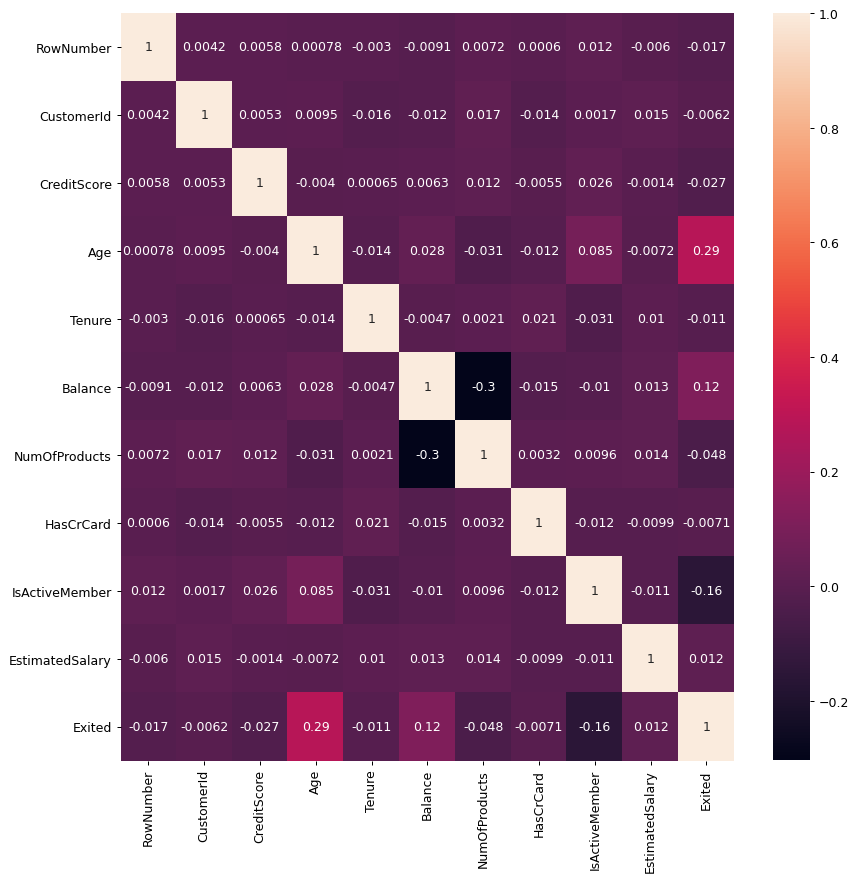

In [14]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(11, 11), dpi=90)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Сильно коррелирующих признаков нет.

### Подготовка данных для обучения модели

Произведем кодировку категориальных признаков методом one hot encoding для тестовых данных:

In [15]:
features_OHE = pd.get_dummies(features)
target_OHE = pd.get_dummies(target)

Отделим от имеющихся данных 10 процентов для последующего тестирования:

In [16]:
features, features_test, target, target_test = train_test_split(features_OHE,target_OHE, test_size = 0.1, random_state = 42)

Произведем масштабирование тестовых данных

In [17]:
features_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,596,32,3.0,96709.07,2,0,0,41788.37,0,1,0,0,1
4684,623,43,1.0,0.00,2,1,1,146379.30,1,0,0,0,1
1731,601,44,4.0,0.00,2,1,0,58561.31,0,0,1,1,0
4742,506,59,8.0,119152.10,2,1,1,170679.74,0,1,0,0,1
4521,560,27,7.0,124995.98,1,1,1,114669.79,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,567,59,3.0,0.00,2,1,0,25843.70,1,0,0,0,1
6685,636,34,8.0,0.00,2,1,0,38570.13,1,0,0,0,1
3194,690,26,3.0,118097.87,1,1,0,61257.83,1,0,0,1,0
1941,452,44,3.0,88915.85,1,1,0,69697.74,0,0,1,0,1


In [19]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary',\
           'Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']

scaler = StandardScaler()
scaler.fit(features_test)
features_test[numeric] = scaler.transform(features_test[numeric])



Разделим данные на тренировочную и валидационную выборки, а также произведем масштабирование данных:

In [20]:
pd.options.mode.chained_assignment = None
features_OHE_train, features_OHE_valid, target_OHE_train, target_OHE_valid = \
train_test_split(features, target, test_size = 0.25, random_state = 12345)

scaler = StandardScaler()
scaler.fit(features_OHE_train)
features_OHE_train[numeric] = scaler.transform(features_OHE_train[numeric])
features_OHE_valid[numeric] = scaler.transform(features_OHE_valid[numeric])

### Обучение моделей

#### Метод решающего дерева

Так как значения признаков имеют сильно отличающийся порядок, то произведем масштабирование признаков:

In [21]:
clf = tree()
params = {'max_depth':range(5,10,1), 'min_samples_leaf':range(1,20,1), 'min_samples_leaf':range(1,40,2), 'random_state' :[12345],'criterion' : ['gini', 'entropy']}
grdclf = GridSearchCV(clf,params)
grdclf.fit(features_OHE_train, target_OHE_train)
bestclf = grdclf.best_estimator_
bestclf

DecisionTreeClassifier(max_depth=7, min_samples_leaf=19, random_state=12345)

Получим предсказания и значение f1 score:

In [22]:
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)
tree_f1

0.5864661654135338

Значение Area Under Curve ROC 0.8517055162313888
--------------------


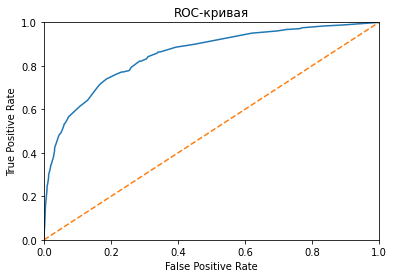

In [23]:
### Здесь комментариями буду задвать вопросы, потому что код написал по примерам в тренажере,
### но полного понимания написанного нет
def get_roc_curve(model,features, target):
    '''
    Функция для построения ROC-curve и вычисления auc_roc_score
    '''
    probabilities_valid  = model.predict_proba(features)#Получаем вероятность отнесения элемента к 0 или 1 классу
    probabilities_one_valid = probabilities_valid[:, 1]# получаем вероятность отнесения к первому классу
    auc_roc = roc_auc_score(target, probabilities_one_valid)
    print(f'Значение Area Under Curve ROC {auc_roc}')
    print('--------------------')
    fpr, tpr, thresholds = roc_curve(target_OHE_valid, probabilities_one_valid)
    """ даем на вход правильные ответы и вероятности отнесения к 1 классу
    #И  внутри функции вычисляется TPR=TP/P, FPR=FP/N? а зачем thresholds ? на графике ведь только FPR, TPR. thresholds - это
    и тчо такое thersholds? что показывают эти значения?
    """
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle = 'dashed', )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    return plt.show() 
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)


**Вывод**

Значение f1_score 0.586, auc_roc_score = 0.85. По данным значениям видно, что модель делает классификацию не очень точно, а так же, что наша модель значительно лучше случайной модели.

#### Метод случайного леса

In [24]:
rfc = RandomForestClassifier()
params = {'max_depth':range(1,11,1), 'min_samples_leaf':range(1,6,1), 'min_samples_split' : range(2,6,2),'n_estimators':[61], 'random_state' :[12345]}
grdclf = GridSearchCV(rfc,params)
grdclf.fit(features_OHE_train, target_OHE_train.values.ravel())
bestclf = grdclf.best_estimator_
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)


In [25]:
bestclf

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=61,
                       random_state=12345)

In [26]:
tree_f1

0.5721925133689839

Построим ROC-curve для проверки адекватности модели

Значение Area Under Curve ROC 0.8516409755731211
--------------------


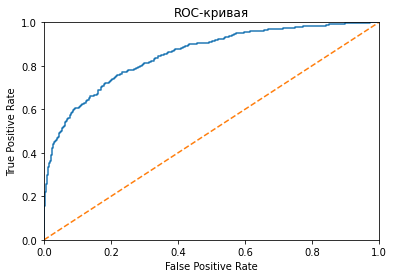

In [27]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

Вывод: Полученное значение f1 score достаточно низкое, при этом наблюдается сильный дисбаланс классов. Устраним дисбаланс и посмотрим на изменение значения f1_score.

## 3. Проверка и борьба с дисбалансом

In [29]:
target_OHE_train.value_counts()

Exited
0         5386
1         1364
dtype: int64

Видим, что элементов 0 класса почти в 4 раза больше чем элементов 1 класса. Скоректируем баланс классов перед последующим обучением. 

### 3.1. Метод upsampling

In [30]:
def upsample(features, target, repeat):
    '''
    Функция увеличивает число элементов класса 0 и перемешивает выборку
    '''
    
    features_zeros = features[target.Exited == 0]
    features_ones = features[target.Exited == 1]
    target_zeros = target[target.Exited == 0]
    target_ones = target[target.Exited == 1]
    
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    print(features_zeros)
    return features_upsampled, target_upsampled

In [31]:
features_upsampled, target_upsampled = upsample(features_OHE_train, target_OHE_train, 4)

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
5441     1.038926 -0.940027 -1.580368  0.957106      -0.907248   0.639676   
4277     1.287465  1.155854 -1.194773  0.769309      -0.907248   0.639676   
5919    -0.058786  0.965319  1.118796 -1.208541       0.813922   0.639676   
521      2.064148  1.632190  0.733201  0.889693      -0.907248   0.639676   
7726     0.873234  1.536923  0.347607  0.934803      -0.907248   0.639676   
...           ...       ...       ...       ...            ...        ...   
5429     0.324378  0.870052  0.733201 -1.208541       0.813922   0.639676   
5860    -2.047094 -0.177889 -0.423583  0.897959       0.813922   0.639676   
7149     0.303667 -0.177889 -0.423583 -1.208541       0.813922   0.639676   
6145    -1.249699 -1.606899  0.733201 -1.208541       0.813922   0.639676   
7836    -0.027718  0.298448 -0.423583 -1.208541       0.813922   0.639676   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany 

#### 3.1.1 Метод решаюшего дерева

In [32]:
clf = tree()
params = {'max_depth':range(5,11,1), 'min_samples_leaf':range(1,10,1), 'min_samples_split':range(2,16,2), 'random_state' :[12345]}
grdclf = GridSearchCV(clf,params)
grdclf.fit(features_upsampled, target_upsampled)
bestclf = grdclf.best_estimator_
bestclf

DecisionTreeClassifier(max_depth=10, random_state=12345)

In [33]:
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)
tree_f1

0.5480427046263344

Далее проверим модель на адекватность - насколько она отличается от случайной модели.

Значение Area Under Curve ROC 0.7516604551172529
--------------------


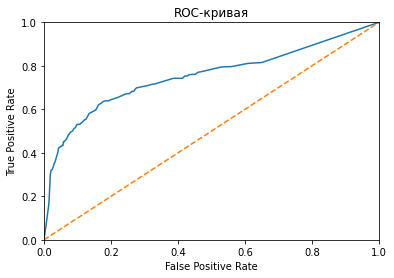

In [34]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.548, auc_roc_score=0.75




#### 3.1.2 RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()
params = {'max_depth':range(1,11,1),'n_estimators':range(70,85,5), 'random_state' :[12345]}
grdclf = GridSearchCV(rfc,params)
grdclf.fit(features_upsampled, target_upsampled.values.ravel())
bestclf = grdclf.best_estimator_
bestclf

RandomForestClassifier(max_depth=10, n_estimators=75, random_state=12345)

In [36]:
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)
tree_f1

0.6187739463601533

Далее проверим модель на адекватность - насколько она отличается от случайной модели.

Значение Area Under Curve ROC 0.8562925968344567
--------------------


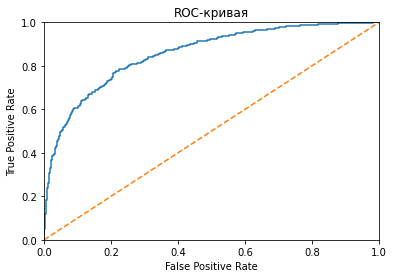

In [37]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.619, auc_roc_score=0.856


### 3.2. Метод downsampling

#### 3.2.1. Метод решающего дерева

In [38]:
def downsample(features, target, fraction):
    features_zeros = features[target.Exited == 0]
    features_ones = features[target.Exited == 1]
    target_zeros = target[target.Exited == 0]
    target_ones = target[target.Exited == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_OHE_train, target_OHE_train, 0.4)

In [39]:
clf = tree()
params = {'max_depth':range(5,11,1), 'min_samples_leaf':range(1,10,1), 'min_samples_split':range(2,16,2), 'random_state' :[12345]}
grdclf = GridSearchCV(clf,params)
grdclf.fit(features_downsampled, target_downsampled)
bestclf = grdclf.best_estimator_
predicted_valid = bestclf.predict(features_OHE_valid )

In [40]:
bestclf

DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=12345)

In [41]:
print("F1:", f1_score(target_OHE_valid, predicted_valid))

F1: 0.6018867924528302


Далее проверим модель на адекватность - насколько она отличается от случайной модели.

Значение Area Under Curve ROC 0.8354090000187755
--------------------


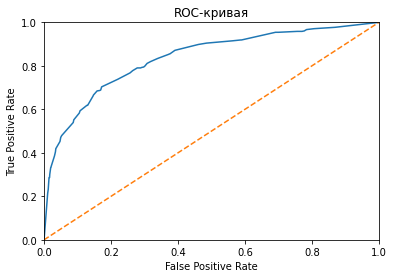

In [42]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.602, auc_roc_score=0.835



#### 3.2.2 Метод случайного леса

In [43]:
rfc = RandomForestClassifier()
params = {'max_depth':[9],'n_estimators':[40], 'min_samples_leaf':range(1,6,1), 'min_samples_split':range(2,8,2),'random_state' :[12345]}
grdclf = GridSearchCV(rfc,params)
grdclf.fit(features_downsampled, target_downsampled.values.ravel())
bestclf_downsample_random_forest = grdclf.best_estimator_
predicted_valid = bestclf_downsample_random_forest.predict(features_OHE_valid)
print("Значение F1:", f1_score(target_OHE_valid, predicted_valid))

Значение F1: 0.6238532110091742


In [44]:
bestclf_downsample_random_forest

RandomForestClassifier(max_depth=9, min_samples_leaf=5, n_estimators=40,
                       random_state=12345)

Значение Area Under Curve ROC 0.851611638910272
--------------------


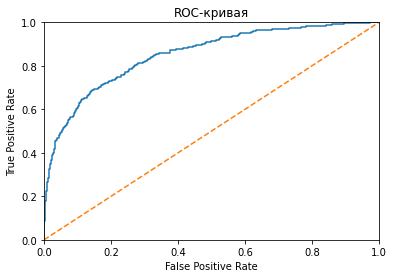

In [45]:
get_roc_curve(bestclf_downsample_random_forest,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.624

### 3.3 Использование параметра class_weigh

#### Метод решающего дерева

In [46]:
clf = tree()
params = {'max_depth':range(4,10,1),'class_weight':['balanced'], 'random_state' :[12345]}
grdclf = GridSearchCV(clf,params)
grdclf.fit(features_OHE_train, target_OHE_train)
bestclf = grdclf.best_estimator_
bestclf

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

In [47]:
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)
tree_f1

0.5789895749799518

Значение Area Under Curve ROC 0.8321385488443702
--------------------


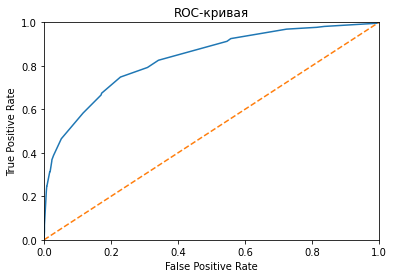

In [48]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.58, auc_roc_score=0.83

#### Метод случайного леса

In [49]:
rfc = RandomForestClassifier()
params = {'max_depth':range(7,11,1),'n_estimators':[70], 'random_state' :[12345]}
grdclf = GridSearchCV(rfc,params)
grdclf.fit(features_OHE_train, target_OHE_train.values.ravel())
bestclf = grdclf.best_estimator_
bestclf

RandomForestClassifier(max_depth=10, n_estimators=70, random_state=12345)

In [50]:
predicted_valid = bestclf.predict(features_OHE_valid)
tree_f1 = f1_score(target_OHE_valid, predicted_valid)
tree_f1

0.568

Значение Area Under Curve ROC 0.8471935374852143
--------------------


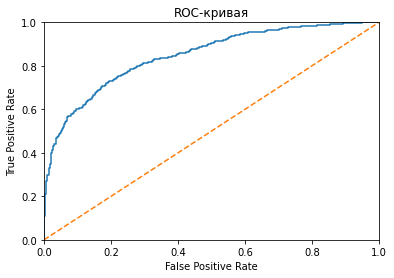

In [51]:
get_roc_curve(bestclf,features_OHE_valid, target_OHE_valid)

**Вывод:**
Значение f1_score 0.57, auc_roc_score=0.85

## Финальное тестирование модели

Протестируем модель, которую показала найболшее значениве f1_score на валидационной выборке, а именно модель случайного леса с сэмплированными данными.

In [54]:
predicted_test = bestclf_downsample_random_forest.predict(features_test)
f1_score(target_test,predicted_test)

0.5974683544303797

In [55]:
probabilities_valid  = bestclf_downsample_random_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print(f'Значение auc_roc для наилучшей модели равно {auc_roc}')

Значение auc_roc для наилучшей модели равно 0.8606902710993469


**Вывод:**


Цель проекта достигнута - получено значение f_1 score не менее 0.59. В процессе обучения модели классификации учтена несбалансированность классов. Разница значений на выборках с несбалансированными данными и сбалансированными не значительная.